# Random Forest Classifier with pipeline and Hyperparameter Tuning

In [180]:
import numpy as np
import pandas as pd
import seaborn as sns
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [130]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [132]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [133]:
df['day'].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [134]:
df['smoker'].value_counts()

smoker
No     151
Yes     93
Name: count, dtype: int64

In [135]:
df.duplicated().sum()

1

In [136]:
df.drop_duplicates(inplace=True)

In [137]:
df.duplicated().sum()

0

In [138]:
df['time'].value_counts()

time
Dinner    176
Lunch      67
Name: count, dtype: int64

# Visualization

In [139]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='sex', ylabel='total_bill'>

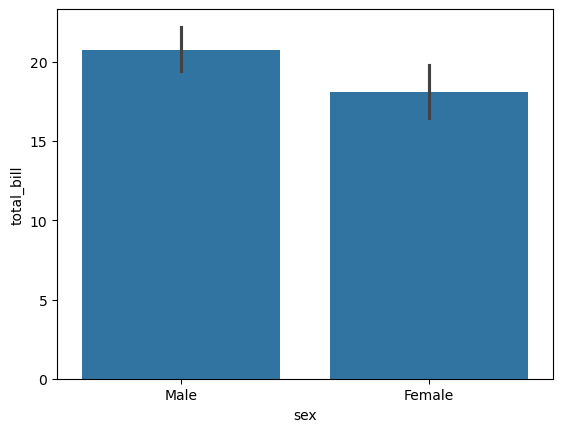

In [140]:
import matplotlib.pyplot as plt

sns.barplot(data=df, x='sex', y='total_bill')

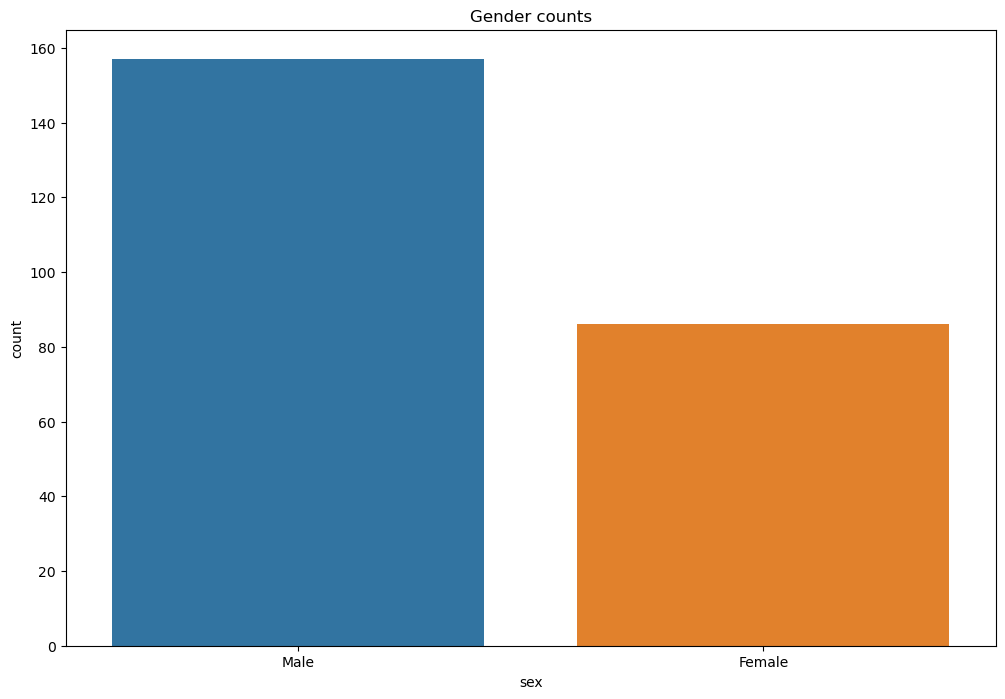

In [141]:
plt.figure(figsize=(12, 8))
sns.countplot(x='sex', data=df, hue='sex')
plt.title('Gender counts')
plt.show()

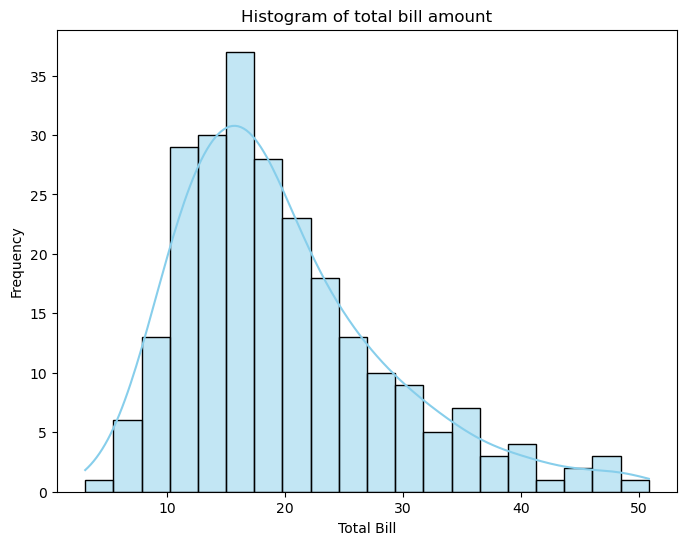

In [142]:
plt.figure(figsize=(8,6))
sns.histplot(df['total_bill'], bins=20, color='skyblue', edgecolor='black', kde=True)
plt.title('Histogram of total bill amount')
plt.xlabel('Total Bill')
plt.ylabel('Frequency')
plt.show()

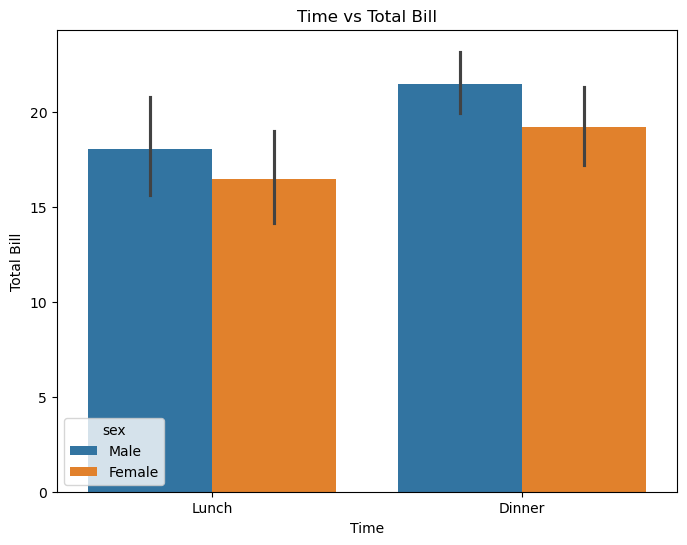

In [143]:
plt.figure(figsize=(8,6))
sns.barplot(data=df, x='time', y='total_bill', hue='sex')
plt.title('Time vs Total Bill')
plt.xlabel('Time')
plt.ylabel('Total Bill')
plt.show()

In [144]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['time'] = encoder.fit_transform(df['time'])

In [145]:
df['time'].unique()

array([0, 1])

In [146]:
#Independent and dependent features
X = df.drop(labels=['time'], axis=1)

In [147]:
y = df.time

In [148]:
df['time'].value_counts()

time
0    176
1     67
Name: count, dtype: int64

In [149]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [181]:
from sklearn.pipeline import Pipeline 
from sklearn.impute import SimpleImputer  ##Handle Missing Values
from sklearn.preprocessing import StandardScaler  ##Feature Scaling
from sklearn.preprocessing import OneHotEncoder     ## Categorical to numerical
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [151]:
cate_col = df.select_dtypes(include=['object', 'category']).columns
num_col = df.select_dtypes(include=['int64', 'float'])

In [152]:
cate_col


Index(['sex', 'smoker', 'day'], dtype='object')

In [199]:
categorical_col = ['sex', 'smoker', 'day']
numerical_col = ['total_bill', 'tip', 'size']
numerical_col
df.shape

(244, 7)

In [182]:
#Feature engeniring automation
# Numerical Pipeline
num_pipeline = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='median')),  ##Missing Values
        ('scaler', StandardScaler())  ##Feature Scalling
    ]
)

#Categorical Pipeline
cat_pipeline = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),    #missing values
        ('onehotencoder', OneHotEncoder(handle_unknown='ignore'))  ##Categorical feature to numerical
    ]
)

In [189]:
preprocessor = ColumnTransformer(
    transformers=[
    ('num_pipeline', num_pipeline, numerical_col),
    ('cat_pipeline', cat_pipeline, categorical_col)
])

In [184]:
#Model Training Automation
models = {
    'Random Forest': RandomForestClassifier()

}

In [197]:
results = []

for name, clf in models.items():
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', clf)
    ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append((name, acc))
    
    

ValueError: Specifying the columns using strings is only supported for dataframes.

In [193]:
def evalute_model(X_train, X_test,y_train,  y_test, model):
    report = {}
    for i in range(len(models)):
        model = list(models.values())[i]

        #Train Model
        model.fit(X_train, y_train)

        #Predicting testing data
        y_test_pred = model.predict(X_test)

        #Get accuracy score for test data
        test_model_score = accuracy_score(y_test, y_test_pred)
        report[list(models.keys())[i]] = test_model_score

    return report



In [194]:
evalute_model(X_train, X_test,y_train, y_test, model)

ValueError: setting an array element with a sequence.